In [1]:
import pandas as pd
import numpy as np
import time
import sys
import itertools
import matplotlib.pyplot as plt

In [2]:
def calculate_makespan(data,m_sequence,order):
    d={}
    makespan=0

    for m in m_sequence:
        d[m]=makespan
        makespan=makespan+data[order[0]][m]

    for j in order: 
        d[0] =d[0]+data[j][0]
        for m in m_sequence[1:]:
            d[m] = max(d[m-1],d[m])+data[j][m]
            
    makespan=list(d.values())[-1] # need to be min
    reward=1/makespan # need to be max
        
    return makespan,reward   

def take_action(s,q_table):
    #Epsilon greedy algorithm to choose action
    if (np.random.uniform() >= EPSILON) or (all(q_value == 0 for q_value in q_table.get(tuple(s)) )):
        action = np.random.choice(s) 
    else:
        action = q_table.get(tuple(s)).index(max(q_table.get(tuple(s))))
    return action

def Q_learning(data):
    
    #Initialize best makespan with large number
    best_makespan=sys.maxsize
    
    j_number = len(data) #Number of jobs to be processed
    m_sequence = list(range(0,len(data[0]))) # machines sequence from 0 to n
    jobs = list(range(0,len(data))) #list of jobs
    
    # Generate Q table with 0 for all Q(s,a)
    q_table =dict()
    for L in range(0, len(jobs)+1):
        for subset in itertools.combinations(jobs, L):
            q_table[subset] = [0 for i in range(j_number)]

    # Start learning
    x = [i for i in range(MAX_EPISODE)] #list of episodes
    y = [] #makespan of each episode
    for i in range(MAX_EPISODE):
        job_sequence =[]
        s = jobs
        while s != []:
            
            #Take action using epsilon greedy algorithm
            action = take_action(s,q_table)
            old_Q = q_table[tuple(s)][action]
            
            # move to the next state
            next_state = list(s)
            next_state.remove(action)
            job_sequence.append(action)

            #maximum Q value of next state taking any actions : Q(s',a')
            maxQ_value = max(q_table[tuple(next_state)])
            
            #Calculate the makespan of recent sequence
            makespan,r=calculate_makespan(data,m_sequence, job_sequence)
            
            #Calculate TD and new Q(s,a)
            Temporal_difference = r + GAMMA * maxQ_value - old_Q
            new_Q = old_Q + ALPHA*Temporal_difference
            
            #Update Q table
            q_table[tuple(s)][action] = new_Q
            
            #Move to the next state to end iteration
            s=next_state
            
        y.append(makespan)
        
        #Choose the best makespan after every episode
        if makespan<best_makespan:
            best_makespan=makespan
            best_sequence = job_sequence
            
   
    
    return best_makespan,best_sequence,x,y

0.15625


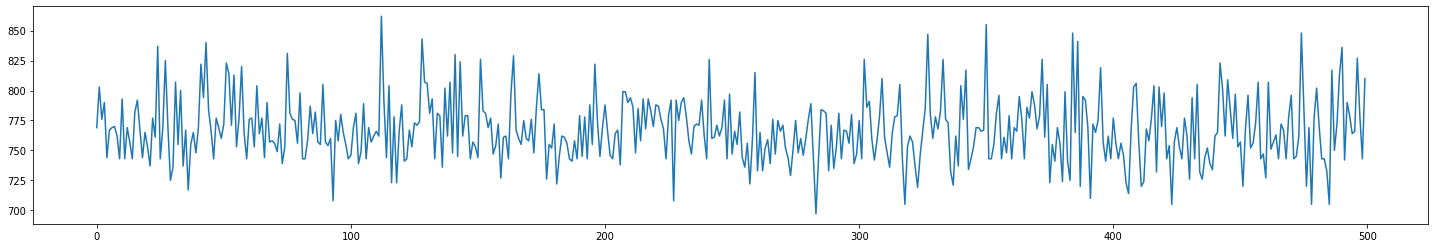

In [3]:
#Setting parameters
EPSILON=0.2
ALPHA = 0.4
GAMMA = 1
MAX_EPISODE = 500

#Loading data
data = pd.read_csv('Data\Small\\' + "VFR10_5_1_Gap"+ ".txt", sep="  ",engine = 'python')
data = data.reset_index().iloc[:,1::2].values.tolist()

#Learning
tic = time.process_time()
best_makespan,best_sequence,x,y = Q_learning(data)
toc = time.process_time()

#Visualizations
plt.figure(figsize=(25,4))
plt.plot(x, y, label = " makespan")

print(toc - tic)